In [1]:
import pandas as pd
import numpy as np

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from string import ascii_letters
import seaborn as sb
from matplotlib import pyplot as plt
import os

### Entrega 10/11 - Dataset lido
Mínimo esperado: um arquivo do jupyter notebook (.ipynb) com o
código que lê o dataset (que também deve ser enviado no git) e realiza limpeza e manipulações necessárias no dataset.

In [2]:
data = pd.read_csv("wine.csv", ";")
data = pd.get_dummies(data)

print(data.shape)
data.head()

(6497, 14)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type_Red,type_White
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


### Entrega 15/11 - Dataset lido e análise exploratória feita
Mínimo esperado: um arquivo do jupyter notebook (.ipynb) com o
código que lê o dataset (que também deve ser enviado no git) e faz uma análise exploratória inicial.

In [3]:
for col in data.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(data[col].value_counts())

----------------------------------------fixed.acidity---------------------------------------- - 

6.80     354
6.60     327
6.40     305
7.00     282
6.90     279
        ... 
14.30      1
15.90      1
13.80      1
14.20      1
6.45       1
Name: fixed.acidity, Length: 106, dtype: int64

----------------------------------------volatile.acidity---------------------------------------- - 

0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
0.805      1
1.130      1
1.185      1
0.565      1
0.865      1
Name: volatile.acidity, Length: 187, dtype: int64

----------------------------------------citric.acid---------------------------------------- - 

0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.66      1
0.75      1
0.86      1
0.99      1
1.23      1
Name: citric.acid, Length: 89, dtype: int64

----------------------------------------residual.sugar---------------------------------------- - 

2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
14.15      1
14.05      1
3.15       1
8.95       1
20.30      1
Name: residual.sugar, Length: 316, dtype: int64

----------------------------------------chlorides---------------------------------------- - 

0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.213      1
0.165      1
0.150      1
0.144      1
0.125      1
Name: chlorides, Length: 214, dtype: int64

----------------------------------------free.sulfur.dioxide---------------------------------------- - 

29.0     183
6.0      170
26.0     161
15.0     157
24.0     152
        ... 
122.5      1
5.5        1
112.0      1
128.0      1
118.5      1
Name: free.sulfur.dioxide, Length: 135, dtype: int64

----------------------------------------total.sulfur.dioxide---------------------------------------- - 

111.0    72
113.0    65
122.0    57
117.0    57
124.0    56
         ..
303.0     1
344.0     1
115.5     1
294.0     1
366.5     1
Name: total.sulfur.dioxide, Length: 276, dtype: int64

----------------------------------------density---------------------------------------- - 

0.99760    69
0.99720    69
0.99800    64
0.99200    64
0.99280    63
           ..
0.99483     1
0.98947     1
0.99837     1
0.99511     1
0.98923     1
Name: density, Length: 998, dtype: int64

----------------------------------------pH---------------------------------------- - 

3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
3.81      1
2.77      1
3.82      1
2.84      1
2.82      1
Name: pH, Length: 108, dtype: int64

----------------------------------------sulphates---------------------------------------- - 

0.50    276
0.46    243
0.54    235
0.44    232
0.38    214
       ... 
1.59      1
1.12      1
1.33      1
1.56      1
1.62      1
Name: sulphates, Length: 111, dtype: int64

----------------------------------------alcohol---------------------------------------- - 

9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
10.533333      1
12.250000      1
10.650000      1
9.750000       1
11.550000      1
Name: alcohol, Length: 111, dtype: int64

----------------------------------------quality---------------------------------------- - 

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

----------------------------------------type_Red---------------------------------------- - 

0    4898
1    1599
Name: type_Red, dtype: int64

----------------------------------------type_White---------------------------------------- - 

1    4898
0    1599
Name: type_White, dtype: int64

A variável target escolhida é "quality" para descobrir qual é a qualidade do vinho analisado. As outras vão ser consideradas features.

### Preparação dos dados
Usando numpy, é possível separar o target dos features e simplificar o processo do algoritmo de machine learning escolhido.

In [4]:
target = data["quality"]

features = data.drop("quality", axis = 1)

print(target.shape)
print(features.shape)

(6497,)
(6497, 13)


### Separando dos dados em treinamento e teste

In [5]:
trn_features, tst_features, trn_target, tst_target = train_test_split(features, target, test_size = 0.3)

### Treinando o 1° modelo
O primeiro modelo escolhido foi o Decision Tree.

In [6]:
clf = DecisionTreeClassifier()

clf.fit(trn_features, trn_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Testando o 1° modelo

In [7]:
error_clf = 1-clf.score(tst_features, tst_target)
print("Erro de classificação: ", error_clf*100, "%")

# Matriz de Confusão
predictions_clf = clf.predict(tst_features)

pd.crosstab(tst_target, predictions_clf, rownames=['Actual Preference'], colnames=['Predicted Preference'])

Erro de classificação:  41.94871794871795 %


Predicted Preference,3,4,5,6,7,8
Actual Preference,,,,,,
3,0,1,2,3,1,0
4,3,15,29,16,7,0
5,0,27,397,192,33,3
6,4,15,177,519,89,18
7,1,1,23,130,176,13
8,0,0,1,11,16,25
9,0,0,1,0,0,1


In [8]:
'''
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_list,  
                   filled=True)
'''

'\nfrom matplotlib import pyplot as plt\nfrom sklearn import tree\nfig = plt.figure(figsize=(25,20))\n_ = tree.plot_tree(clf, \n                   feature_names=feature_list,  \n                   filled=True)\n'

### Treinando o 2° modelo
O segundo modelo escolhido é o Random Forest

In [9]:
# O modelo vai ser iniciado com 1000 árvores
rf = RandomForestClassifier(oob_score = True, n_estimators = 1000, max_features = 5, n_jobs=-1, criterion = "entropy")
rf.fit(trn_features, trn_target);

### Testando o 2° modelo

In [10]:
# Probabilidade das previsões do modelo
predictions_prob_rf = rf.predict_proba(tst_features)
predictions_rf = rf.predict(tst_features)

error_rf = 1 - rf.score(tst_features, tst_target)

# Erro total de classificação
print('Prediction prob:',round(np.mean(predictions_prob_rf),4)*100, "%")
print('Mean Absolute Error:', round(error_rf,4)*100, "%")

# Matriz de confusão
pd.crosstab(tst_target, predictions_rf, rownames=['Actual Preference'], colnames=['Predicted Preference'])

Prediction prob: 14.29 %
Mean Absolute Error: 34.21 %


Predicted Preference,4,5,6,7,8
Actual Preference,,,,,
3,0,3,4,0,0
4,9,41,19,1,0
5,0,445,201,6,0
6,1,135,640,44,2
7,0,10,162,169,3
8,0,0,18,15,20
9,0,0,2,0,0


### Análise descritiva

Aqui começa a análise descritiva. Dentro desta parte, temos:
<li> O uso do método .describe() para achar o os quartis, média e desvio padrão do dataframe
<li> O cálculo dos limites inferiores e superiores de cada coluna do dataframe, para a checagem de possíveis outliers
<li> <strike> A análise dos outliers </strike>
<li> A criação de dois correlogramas, usando tanto o coeficiente τ de Kendall quanto o de Spearman

In [11]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type_Red,type_White
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [12]:
q1 = data.describe(include='all').loc['25%']
q3 = data.describe(include='all').loc['75%']

higher, lower = [], []

for v in range(0, len(q1)-2):
    lower.append(q1[v]-1.5*(q3[v]-q1[v]))
    higher.append(q3[v]+1.5*(q3[v]-q1[v]))

https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

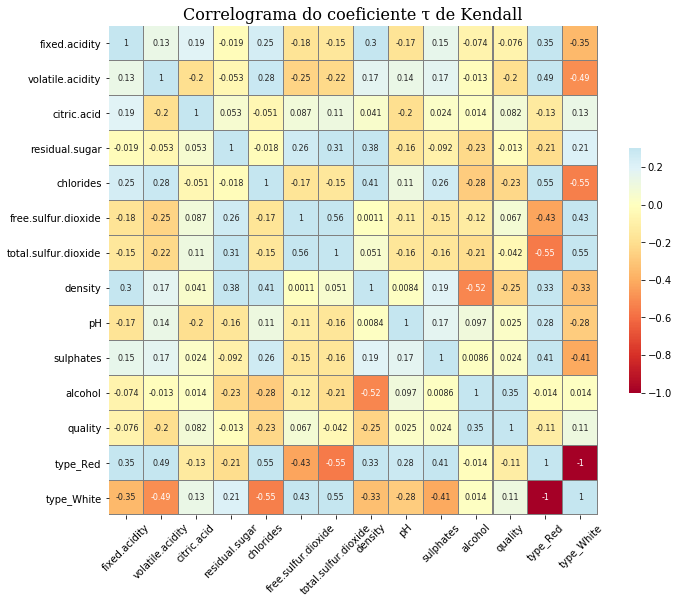

In [13]:
korr = data.corr(method='kendall')
f, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(korr, vmax = 0.3, cmap = "RdYlBu", center = 0, annot = True, annot_kws = {"size":8}, linewidths = .05, 
           linecolor = 'grey', cbar = True, cbar_kws = {"shrink":.5}, square = True, mask = False)

plt.title('Correlograma do coeficiente τ de Kendall', fontsize=16, fontfamily='serif')
plt.xticks(rotation = 45, size = 10)
plt.yticks(rotation = 0, size = 10)
plt.show()

https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

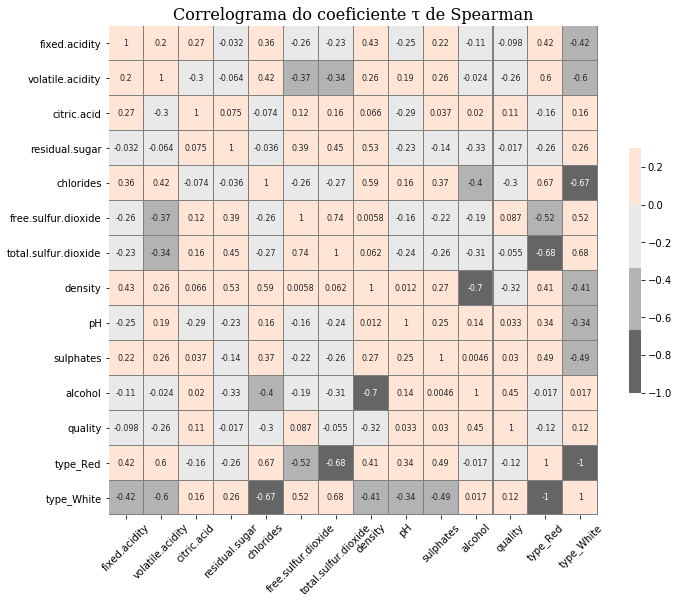

In [14]:
corr = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.color_palette("RdGy_r")

sb.heatmap(corr, vmax = 0.3, cmap = cmap, center = 0, annot = True, annot_kws = {"size":8}, linewidths = .05, 
           linecolor = 'grey', cbar = True, cbar_kws = {"shrink":.5}, square = True, mask = False)

plt.title('Correlograma do coeficiente τ de Spearman', fontsize=16, fontfamily='serif')
plt.xticks(rotation = 45, size = 10)
plt.yticks(rotation = 0, size = 10)
plt.show()

### Referências: <br>
<li> https://blog.softhints.com/pandas-value_counts-multiple-columns/
<li> https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
<li> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
<li> https://pandas.pydata.org/pandas-docs/stable/index.html
<li> https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
<li> https://www.python-course.eu/Boosting.php
<li> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
<li> https://medium.com/turo-engineering/how-not-to-use-random-forest-265a19a68576
<li> https://stackoverflow.com/questions/38195766/poor-performance-of-randomforestclassifier
<li> https://www.kaggle.com/c/forest-cover-type-prediction/notebooks
<li> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<li> https://www.datacamp.com/community/tutorials/random-forests-classifier-python
<li> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
<li> https://core.ac.uk/download/pdf/237326108.pdf

In [ ]:
plt.figure(figsize=(15,15))
plt.boxplot(data, meanline = True, showcaps = True, showbox = True, showfliers = True, showmeans = True)